# Projekt LAB 1 Dane Facebook 
Maciej Klimiuk , Hanna Mika



In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics._regression import root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [337]:
# Wczytaj dane
data = pd.read_csv("data.csv", sep=";")
# nowa kolumna o nazwie koszty = przychód - zysk
data["Koszty w mln $"] = data["Przychód w mln $"] - data["Zysk w mln $"]
print(data)


     Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  Użytkownicy_mln  \
0   2007               153          -138           450                0   
1   2008               272           -56           850                0   
2   2009               777           229          1218              360   
3   2010              1974           606          2127              608   
4   2011              3711          1000          3200              845   
5   2012              5089            53          4619             1056   
6   2013              7872          1500          6337             1228   
7   2014             12466          2940          9199             1393   
8   2015             17928          3688         12691             1591   
9   2016             27638         10217         17048             1860   
10  2017             40653         15934         25105             2129   

    Koszty w mln $  
0              291  
1              328  
2              548  
3             1

In [338]:
#(2018-2022) - przychód, zysk, koszty, zatrudnienie, liczba użytkowników
Liczba_urzytkownikow_od_q = {
    'Q':
        ['Q1 18', 'Q2 18', 'Q3 18', 'Q4 18',
         'Q1 19', 'Q2 19', 'Q3 19', 'Q4 19',
         'Q1 20', 'Q2 20', 'Q3 20', 'Q4 20',
         'Q1 21', 'Q2 21', 'Q3 21', 'Q4 21',
         'Q1 22', 'Q2 22', 'Q3 22', 'Q4 22'],
    'Użytkownicy_mln':
        [2196, 2234, 2271, 2320, 2375, 2414, 2449, 2498, 2603, 2701, 2740, 2797,
         2853, 2895, 2910, 2912, 2936, 2934, 2958, 2963]
}

fb_future = {
    'Rok': [2018, 2019, 2020, 2021, 2022],
    'Przychod': [55838, 70697, 85965, 117929, 116609],
    'Profit': [22112, 18485, 29146, 39370, 23200],
    'Koszty': [33726, 52212, 56819, 78559, 93409],
    'Zatrudnienie': [35587, 44942, 58604, 71970, 87314],
    'ilosc_uzytkownikow': [2320, 2498, 2797, 2912, 2963]
}
# przekształcenie słownika na DataFrame
data_future1 = pd.DataFrame(Liczba_urzytkownikow_od_q)
data_future = pd.DataFrame(fb_future)
print(data_future)


    Rok  Przychod  Profit  Koszty  Zatrudnienie  ilosc_uzytkownikow
0  2018     55838   22112   33726         35587                2320
1  2019     70697   18485   52212         44942                2498
2  2020     85965   29146   56819         58604                2797
3  2021    117929   39370   78559         71970                2912
4  2022    116609   23200   93409         87314                2963


In [339]:
# wszystkie korelacje
print(data.corr())

# wysietlenie informacji o danych statycztycznych
print(data.describe())

                       Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  \
Rok               1.000000          0.892709      0.800024      0.917137   
Przychód w mln $  0.892709          1.000000      0.977588      0.997597   
Zysk w mln $      0.800024          0.977588      1.000000      0.962063   
Zatrudnienie      0.917137          0.997597      0.962063      1.000000   
Użytkownicy_mln   0.996088          0.893330      0.805706      0.916392   
Koszty w mln $    0.930780          0.991064      0.940772      0.997032   

                  Użytkownicy_mln  Koszty w mln $  
Rok                      0.996088        0.930780  
Przychód w mln $         0.893330        0.991064  
Zysk w mln $             0.805706        0.940772  
Zatrudnienie             0.916392        0.997032  
Użytkownicy_mln          1.000000        0.928180  
Koszty w mln $           0.928180        1.000000  
               Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  \
count    11.000000         11.00000

In [340]:
# wykresy

fig = px.scatter_matrix(data)
fig.show()


Współczynniki modelu R^2:  0.8121169252480658
Współczynnik modelu RMSE: 16285286.357758908
Odchylenie standardowe modelu2: 3044.4702431536757


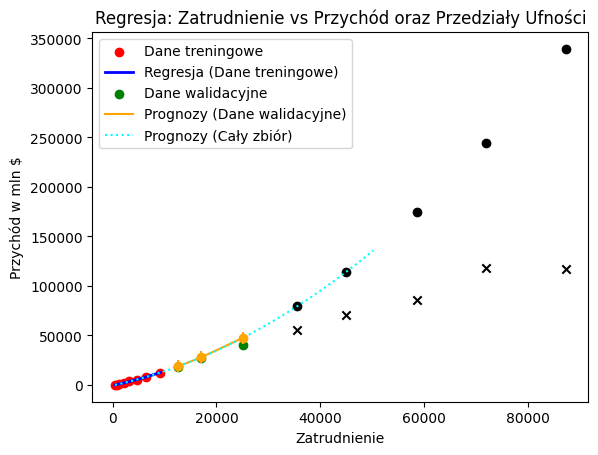

Wzór regresji kwadratowej: y = -526.7069795869229 + 1.119395477790044 * x + 3.175135170954074e-05 * x^2


In [341]:
# GOOD


#3. Przychód(OY)  liczba pracowników (OX)


#model kwadratowy nr 1
# dane testowe pierwsze 6 wartosci, kolejne 3 wartosci to dane walidacyjne
y_train = data["Przychód w mln $"][:8]
y_test = data["Przychód w mln $"][8:]
X_train = data[["Zatrudnienie"]][:8]
X_test = data[["Zatrudnienie"]][8:]


# zmiana danych na wielomianowe stopnia 2
X_train_poly = np.c_[X_train, X_train**2]
X_test_poly = np.c_[X_test, X_test**2]

# trenowanie modelu
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

# prognozy dla danych walidacyjnych
y_pred_test = model2.predict(X_test_poly)

print("Współczynniki modelu R^2: ", model2.score(X_test_poly, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))



# prognozy dla całego zbioru danych
data["Prognoza_Przychód"] = model2.predict(np.c_[data[["Zatrudnienie"]], data[["Zatrudnienie"]]**2])



# Wykres
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
# Linia przerywana dla regresji danych treningowych
plt.plot(
    X_train,
    model2.predict(X_train_poly),
    color='blue',
    linewidth=2,
    label='Regresja (Dane treningowe)'
)

# odchylenie standardowe modelu2 np.std
print("Odchylenie standardowe modelu2:", np.std(model2.predict(X_test_poly) - y_test))

plt.scatter(X_test, y_test, color='green', label='Dane walidacyjne')
plt.plot(X_test, y_pred_test, color='orange', label='Prognozy (Dane walidacyjne)')

# Wydłużenie linii regresji dla całego zbioru
zatrudnienie_extended = np.linspace(data["Zatrudnienie"].min(), data["Zatrudnienie"].max() * 2, 500)
prognoza_extended = model2.predict(
    np.c_[zatrudnienie_extended, zatrudnienie_extended**2]
)
# Linia przerywana dla regresji całego zbioru
plt.plot(zatrudnienie_extended, prognoza_extended, color='cyan', linestyle='dotted', label='Prognozy (Cały zbiór)')
#bar error
plt.legend()
# Obliczenie reszt modelu (różnice między przewidywaniami a rzeczywistymi wartościami)
residuals = y_test - y_pred_test

# Odchylenie standardowe reszt
std_error = np.std(residuals)

# Wyznaczenie przedziału ufności
confidence_interval = 1.96 * std_error  # 95% przedział ufności

# Dodanie errorbar
plt.errorbar(
    X_test.squeeze(),
    y_pred_test,
    yerr=confidence_interval,
    fmt='o',
    color='orange',
    label='Prognozy (Dane walidacyjne)'
)


plt.scatter(data_future["Zatrudnienie"], data_future["Przychod"], color='black', label='Dane Rzeczywiste (2018-2022)', marker='x')
# dodać regresje dla danych rzeczywistych
plt.scatter(data_future["Zatrudnienie"], model2.predict(np.c_[data_future["Zatrudnienie"], data_future["Zatrudnienie"]**2]), color='black', label='Regresja (2018-2022)')

plt.xlabel("Zatrudnienie")
plt.ylabel("Przychód w mln $")
plt.title("Regresja: Zatrudnienie vs Przychód oraz Przedziały Ufności")
plt.show()

# wzór regresji kwadratowej

# y = a0 + a1*x + a2*x^2
a0 = model2.intercept_
a1 = model2.coef_[0]
a2 = model2.coef_[1]

print("Wzór regresji kwadratowej:", f"y = {a0} + {a1} * x + {a2} * x^2")



Współczynniki modelu R^2:  0.9419825653067996
Współczynnik modelu RMSE: 52.90368350020426
Prognozy użytkowników na lata 2018-2021:
    Rok  Prognoza_Użytkownicy
0  2018           2258.828571
1  2019           2465.571429
2  2020           2672.314286
3  2021           2879.057143




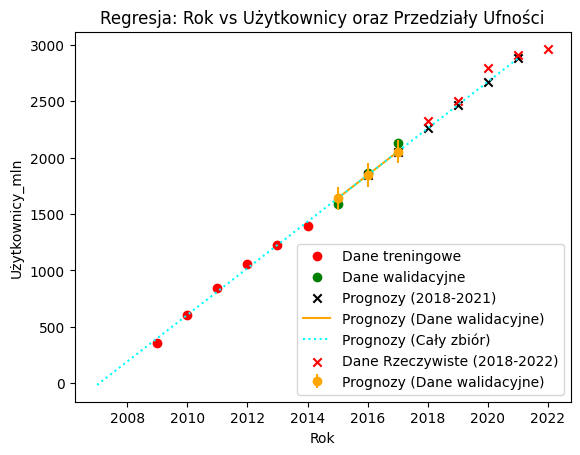

Wzór regresji liniowej: y = -414948.2571428572 + 206.74285714285716 * x


In [342]:
# GOOD

#5. Liczba użytkowników (OY) od czasu (OX)

# dane treningowe to pierwsze 6 rekordów, a dane walidacyjne to ostatnie 3 rekordy
#Najpierw trenujemy model na danych treningowych, a następnie przewidujemy wartości dla danych walidacyjnyc

# trenowanie modelu
X_train = data[["Rok"]][2:8]
X_test = data[["Rok"]][8:]
y_train = data["Użytkownicy_mln"][2:8]
y_test = data["Użytkownicy_mln"][8:]




# trenowanie modelu
model4 = LinearRegression()
model4.fit(X_train, y_train)

# prognozy dla danych walidacyjnych
y_pred_test = model4.predict(X_test)

# ocena jakości modelu na danych walidacyjnych
print("Współczynniki modelu R^2: ", model4.score(X_test, y_test))
rmse_5=root_mean_squared_error(y_test, y_pred_test)
print("Współczynnik modelu RMSE:", rmse_5)

# wypisanie wartosci na lata 2018-2021
X_future = pd.DataFrame({"Rok": [2018, 2019, 2020, 2021]})
data_future_2 = pd.concat([data, X_future], axis=0)
data_future_2["Prognoza_Użytkownicy"] = model4.predict(data_future_2[["Rok"]])

print("Prognozy użytkowników na lata 2018-2021:")
# wypisanie prognoz na lata 2018-2021
print(data_future_2[["Rok", "Prognoza_Użytkownicy"]][11:])
# przerwa /n
print("\n")


# wykres
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.scatter(X_test, y_test, color='green', label='Dane walidacyjne')

# prognozy punktowe dla lat 2018-2021
plt.scatter(data_future_2[["Rok"]][9:], data_future_2["Prognoza_Użytkownicy"][9:], color='black', label='Prognozy (2018-2021)', marker='x')
# error bar dla prognozowanych wartości Dla większej dokładności mógłbyś uwzględnić wariancję zależną od wartości przewidywanych (heteroskedastyczność
plt.errorbar(
    X_test.squeeze(),
    y_pred_test,
    yerr=1.96 * rmse_5,
    fmt='o',
    color='orange',
    label='Prognozy (Dane walidacyjne)'
)
plt.plot(X_test, y_pred_test, color='orange', label='Prognozy (Dane walidacyjne)')


# wykres predykcja modelu nr 5 linia przerywana
plt.plot(data_future_2[["Rok"]], data_future_2["Prognoza_Użytkownicy"], color='cyan',  linestyle='dotted'  , label='Prognozy (Cały zbiór)')
plt.scatter(data_future["Rok"], data_future["ilosc_uzytkownikow"], color='Red', label='Dane Rzeczywiste (2018-2022)', marker='x')

plt.legend()
plt.xlabel("Rok")
plt.ylabel("Użytkownicy_mln")
plt.title("Regresja: Rok vs Użytkownicy oraz Przedziały Ufności")
plt.show()

#wyliczenie współczynników modelu
a0 = model4.intercept_
a1 = model4.coef_[0]

print("Wzór regresji liniowej:", f"y = {a0} + {a1} * x")





Współczynniki modelu R^2:  0.9359802219475449
Współczynnik modelu RMSE: 2355.6510224878225


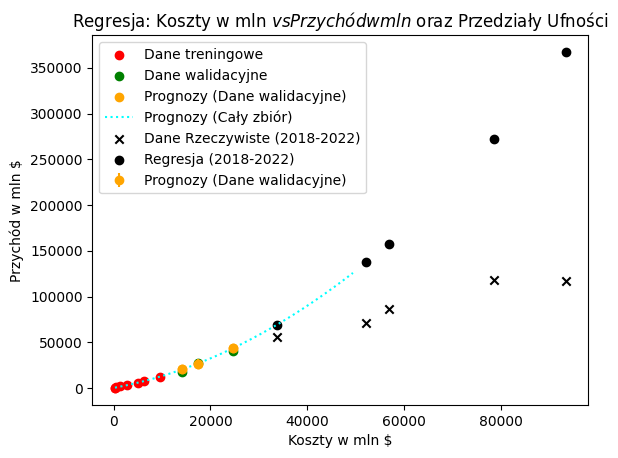

In [343]:
#5. Koszty (OX) przychód(OY)


X_train = data[["Koszty w mln $"]][:8]
X_test = data[["Koszty w mln $"]][8:]
y_train = data["Przychód w mln $"][:8]
y_test = data["Przychód w mln $"][8:]


# zmiana Transformation: Polynomial degree 2 on X
X_train_poly = np.c_[X_train, X_train**2]
X_test_poly = np.c_[X_test, X_test**2]

# trenowanie modelu
model5 = LinearRegression()

model5.fit(X_train_poly, y_train)

# prognozy dla danych walidacyjnych
y_pred_test = model5.predict(X_test_poly)

print("Współczynniki modelu R^2: ", model5.score(X_test_poly, y_test))
rmse_6=root_mean_squared_error(y_test, y_pred_test)
print("Współczynnik modelu RMSE:", rmse_6)

# wykres
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.scatter(X_test, y_test, color='green', label='Dane walidacyjne')
plt.scatter(X_test, y_pred_test, color='orange', label='Prognozy (Dane walidacyjne)')
# Wydłużenie linii regresji dla całego zbioru
koszty_extended = np.linspace(data["Koszty w mln $"].min(), data["Koszty w mln $"].max() * 2, 500)
prognoza_extended = model5.predict(np.c_[koszty_extended, koszty_extended**2])
plt.plot(koszty_extended, prognoza_extended, color='cyan', linestyle='dotted', label='Prognozy (Cały zbiór)')
#error bar
plt.errorbar(
    X_test.squeeze(),
    y_pred_test,
    yerr=1.96 * rmse_6,
    fmt='o',
    color='orange',
    label='Prognozy (Dane walidacyjne)'
)
plt.scatter(data_future["Koszty"], data_future["Przychod"], color='black', label='Dane Rzeczywiste (2018-2022)', marker='x')
# regresja dla danych rzeczywistych  jak wygladałyby punkty dla wartosci data_future["Koszty"]
plt.scatter(data_future["Koszty"], model5.predict(np.c_[data_future["Koszty"], data_future["Koszty"]**2]), color='black', label='Regresja (2018-2022)')
plt.legend()
plt.xlabel("Koszty w mln $")
plt.ylabel("Przychód w mln $")
plt.title("Regresja: Koszty w mln $ vs Przychód w mln $ oraz Przedziały Ufności")
plt.show()


Współczynniki modelu R^2:  0.8035187570661307
Współczynnik modelu RMSE: 4126.809472335865


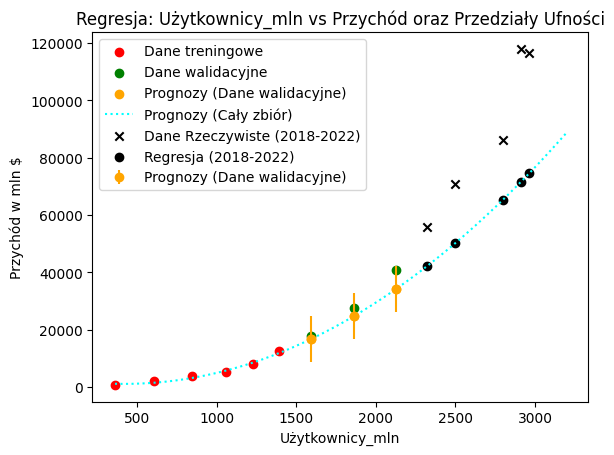

Wzór regresji kwadratowej: y = 3060.102171524998 + -9.45505920492383 * x + 0.01132737934806115 * x^2


In [344]:
# GOOD


# #1. Przychód (OY) od liczby użytkowników (OX)

# dane treningowe to pierwsze 8 rekordów, a dane walidacyjne to ostatnie 3 rekordy
#Najpierw trenujemy model na danych treningowych, a następnie przewidujemy wartości dla danych walidacyjnych
#Dane walidacyjne są używane do oceny jakości modelu
#Następnie przewidujemy wartości dla całego zbioru danych, aby zobaczyć, jak model zachowuje się na całym zbiorze danych


# trenowanie modelu
from sklearn.preprocessing import PolynomialFeatures


# Podział na dane treningowe i walidacyjne
X_train = data[["Użytkownicy_mln"]][2:8]
X_test = data[["Użytkownicy_mln"]][8:]
y_train = data["Przychód w mln $"][2:8]
y_test = data["Przychód w mln $"][8:]

# Zmiana danych na wielomianowe stopnia 2


poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Trenowanie modelu
model4 = LinearRegression()
model4.fit(X_train_poly, y_train)

# Prognozy dla danych walidacyjnych
y_pred_test = model4.predict(X_test_poly)

# Ocena jakości modelu na danych walidacyjnych
print("Współczynniki modelu R^2: ", model4.score(X_test_poly, y_test))
rmse_7=root_mean_squared_error(y_test, y_pred_test)
print("Współczynnik modelu RMSE:", rmse_7)
#wykresy
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.scatter(X_test, y_test, color='green', label='Dane walidacyjne')
plt.scatter(X_test, y_pred_test, color='orange', label='Prognozy (Dane walidacyjne)')
# Wydłużenie linii regresji dla całego zbioru
uzytkownicy_extended = np.linspace(data["Użytkownicy_mln"][2], data["Użytkownicy_mln"].max() * 1.5, 500)
prognoza_extended = model4.predict(poly.transform(pd.DataFrame(uzytkownicy_extended, columns=["Użytkownicy_mln"])))

plt.plot(uzytkownicy_extended, prognoza_extended, color='cyan', linestyle='dotted', label='Prognozy (Cały zbiór)')
#error bar
plt.errorbar(
    X_test.squeeze(),
    y_pred_test,
    yerr=1.96 * rmse_7,
    fmt='o',
    color='orange',
    label='Prognozy (Dane walidacyjne)'
)
plt.scatter(data_future["ilosc_uzytkownikow"], data_future["Przychod"], color='black', label='Dane Rzeczywiste (2018-2022)', marker='x')
#wylicz wartosc przychodu dla danych rzeczywistych
# Prognozy dla danych przyszłościowych i dodanie ich do linii regresji
data_future = data_future.rename(columns={"ilosc_uzytkownikow": "Użytkownicy_mln"})
# zaznaczenie na wykresie wartosci przychodu dla danych rzeczywistych wydłużenie linii regresji
plt.scatter(data_future["Użytkownicy_mln"], model4.predict(poly.transform(data_future[["Użytkownicy_mln"]])), color='black', label='Regresja (2018-2022)')
plt.legend()
plt.xlabel("Użytkownicy_mln")
plt.ylabel("Przychód w mln $")
plt.title("Regresja: Użytkownicy_mln vs Przychód oraz Przedziały Ufności")
plt.show()

# wzor regresji kwadratowej
a0 = model4.intercept_
a1, a2 = model4.coef_
# wyswietlenie wzoru
print("Wzór regresji kwadratowej:", f"y = {a0} + {a1} * x + {a2} * x^2")



Współczynniki modelu R^2:  0.9586085058521161
Współczynnik modelu RMSE: 1046.2328106625491


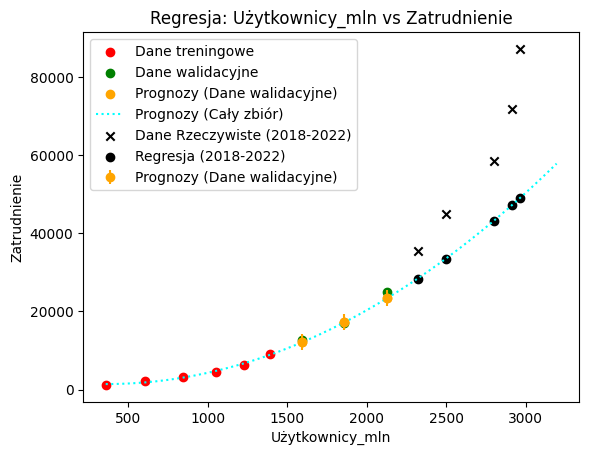

In [345]:
#GOOD


#  OX - liczba użytkowników, OY - poziom zatruudnienia
# dane treningowe to pierwsze 8 rekordów, a dane walidacyjne to ostatnie 3 rekordy
#Najpierw trenujemy model na danych treningowych, a następnie przewidujemy wartości dla danych walidacyjnych

# trenowanie modelu
# Podział na dane treningowe i walidacyjne
X_train = data[["Użytkownicy_mln"]][2:8]
X_test = data[["Użytkownicy_mln"]][8:]
y_train = data["Zatrudnienie"][2:8]
y_test = data["Zatrudnienie"][8:]

# Zmiana danych na wielomianowe stopnia 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Trenowanie modelu
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prognozy dla danych walidacyjnych
y_pred_test = model.predict(X_test_poly)

# Ocena jakości modelu na danych walidacyjnych
print("Współczynniki modelu R^2: ", model.score(X_test_poly, y_test))
rmse=root_mean_squared_error(y_test, y_pred_test)
print("Współczynnik modelu RMSE:", rmse)

# Wykres
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.scatter(X_test, y_test, color='green', label='Dane walidacyjne')
plt.scatter(X_test, y_pred_test, color='orange', label='Prognozy (Dane walidacyjne)')


# Wydłużenie linii regresji dla całego zbioru
uzytkownicy_extended = np.linspace(data["Użytkownicy_mln"][2], data["Użytkownicy_mln"].max() * 1.5, 500)
prognoza_extended = model.predict(poly.transform(pd.DataFrame(uzytkownicy_extended, columns=["Użytkownicy_mln"])))
plt.plot(uzytkownicy_extended, prognoza_extended, color='cyan', linestyle='dotted', label='Prognozy (Cały zbiór)')
#error bar
plt.errorbar(
    X_test.squeeze(),
    y_pred_test,
    yerr=1.96 * rmse,
    fmt='o',
    color='orange',
    label='Prognozy (Dane walidacyjne)'
)
# dane rzeczywiste
plt.scatter(data_future["Użytkownicy_mln"], data_future["Zatrudnienie"], color='black', label='Dane Rzeczywiste (2018-2022)', marker='x')
# zaznaczenie na wykresie wartosci przychodu dla danych rzeczywistych wydłużenie linii regresji
plt.scatter(data_future["Użytkownicy_mln"], model.predict(poly.transform(data_future[["Użytkownicy_mln"]])), color='black', label='Regresja (2018-2022)')

# Regresja na wraz z przewidywaniami wydłużona dla całego zbioru
plt.legend()
plt.xlabel("Użytkownicy_mln")
plt.ylabel("Zatrudnienie")
plt.title("Regresja: Użytkownicy_mln vs Zatrudnienie")
plt.show()

